<a href="https://colab.research.google.com/github/ajay-nrg/DeepLearning/blob/master/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
#The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data

17465344/17464789 [==============================] - 2s 0us/step


In [15]:
print(test_data.shape)
train_data.shape

(25000,)


(25000,)

In [5]:
train_labels[0]
#train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
#here’s how you can quickly decode one of these reviews back to English words:
word_index = imdb.get_word_index()
#word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#Reverses it, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” 
#“start of sequence,” and “unknown.”

In [16]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
y_train[0]

1.0

In [20]:
#Model Definition 
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
#compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [22]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [23]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [24]:
#Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
#Training your model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.5113 - acc: 0.7968 - val_loss: 0.3949 - val_acc: 0.8654
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3102 - acc: 0.9035 - val_loss: 0.3229 - val_acc: 0.8740
Epoch 3/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2274 - acc: 0.9285 - val_loss: 0.2842 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1791 - acc: 0.9449 - val_loss: 0.2972 - val_acc: 0.8825
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1483 - acc: 0.9527 - val_loss: 0.2778 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1195 - acc: 0.9636 - val_loss: 0.2914 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1014 - acc: 0.9708 - val_loss: 0.3051 - val_ac

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

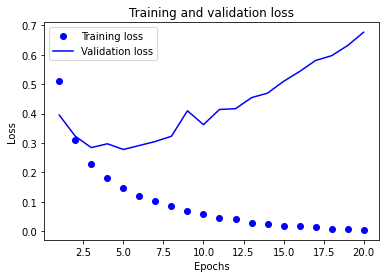

In [28]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

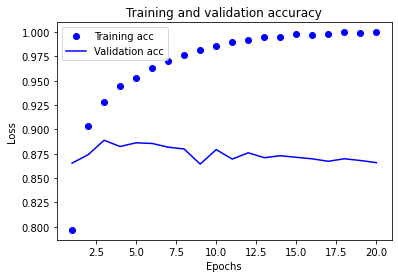

In [32]:
#Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4510 - accuracy: 0.8163
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2594 - accuracy: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2005 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 2s 64us/step


In [34]:
model.predict(x_test)

array([[0.15576702],
       [0.9991169 ],
       [0.713868  ],
       ...,
       [0.10271269],
       [0.04343748],
       [0.5469853 ]], dtype=float32)